In [24]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import os

In [26]:
#load Files
debussy_file_1 = r'C:\Users\sande\OneDrive\Documents\GitHub\ASE_practice\DataSet\sound-of-pouring-liquid-into-a-glass-hd-263175.mp3'
ipd.Audio(debussy_file_1) # load a local WAV file



In [27]:
debussy_file_2 = r'C:\Users\sande\OneDrive\Documents\GitHub\ASE_practice\DataSet\sound-effects-single-gun-shot-247124.mp3'
ipd.Audio(debussy_file_2) # load a local WAV file

In [30]:
debussy_1, sr_1 = librosa.load(debussy_file_1)
print(debussy_1.shape, sr_1)

debussy_2, sr_2 = librosa.load(debussy_file_2)
print(debussy_2.shape, sr_2)


(132830,) 22050
(101376,) 22050


In [29]:
#extract RMSE with librosa
frame_length = 1024
hop_length = 512

rms_debussy_1 = librosa.feature.rms(y=debussy_1, frame_length=frame_length, hop_length=hop_length)[0]
print(rms_debussy_1.shape)

rms_debussy_2 = librosa.feature.rms(y=debussy_2, frame_length=frame_length, hop_length=hop_length)[0]
print(rms_debussy_2.shape)

(260,)
(199,)


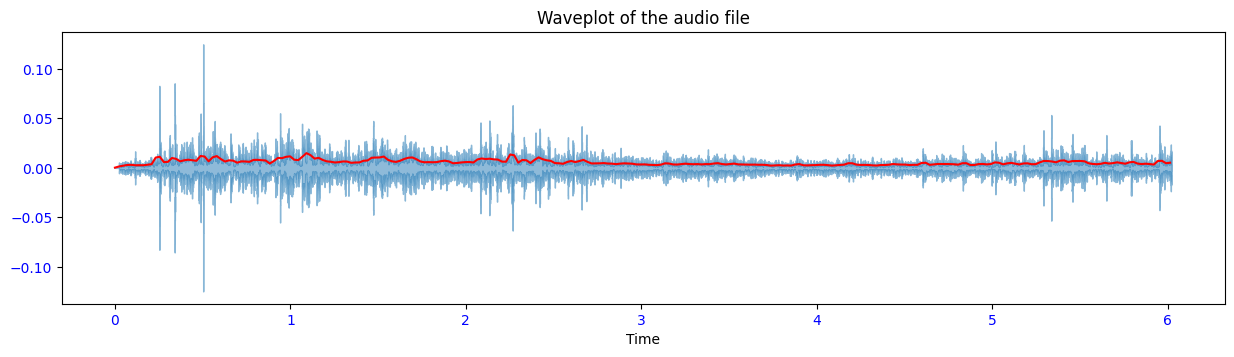

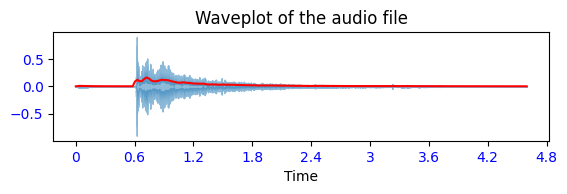

In [37]:
#plot rmse
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy_1, sr=sr_1, alpha=0.5)
plt.plot(librosa.frames_to_time(range(len(rms_debussy_1)), sr=sr_1, hop_length=hop_length), rms_debussy_1, color='r')
plt.title('Waveplot of the audio file')
plt.xticks(color='b')
plt.yticks(color='b')
plt.show()

plt.subplot(3, 1, 2)
librosa.display.waveshow(debussy_2, sr=sr_2, alpha=0.5)
plt.plot(librosa.frames_to_time(range(len(rms_debussy_2)), sr=sr_2, hop_length=hop_length), rms_debussy_2, color='r')
plt.title('Waveplot of the audio file')
plt.xticks(color='b')
plt.yticks(color='b')
plt.show()



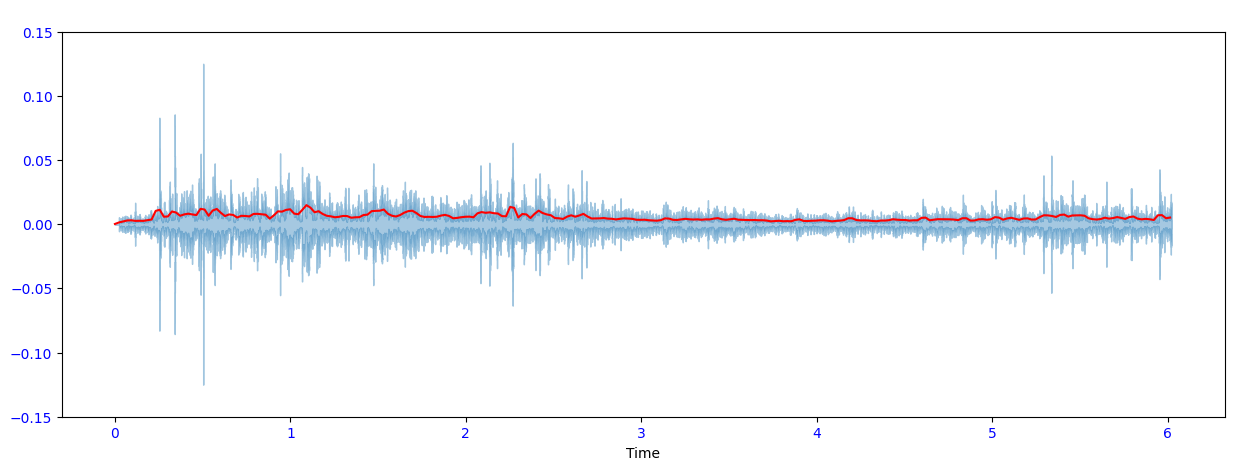

In [22]:
frames = range(len(rms_debussy))
t = librosa.frames_to_time(frames, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(debussy, alpha=0.4)
plt.plot(t, rms_debussy, color='r')
plt.ylim((-0.15, 0.15))
plt.xticks(color='b')
plt.yticks(color='b')
plt.title('Waveform and RMSE', color='w')
plt.show()


In [45]:
def rms(signal, frame_length, hop_length):
    rmse = []
    for i in range(0, len(signal), hop_length): # hop_length = number of samples between the start of consecutive frames
        rmse_current_frame = np.sqrt(np.mean(signal[i:i+frame_length]**2))
        rmse.append(rmse_current_frame)
    return np.array(rmse)
 
frame_length = 1024
hop_length = 512
rmse_debussy_a = rms(debussy_1, frame_length, hop_length)
print(rmse_debussy_a.shape)

rmse_debussy_b = rms(debussy_2, frame_length, hop_length)   
print(rmse_debussy_b.shape)


(260,)
(198,)


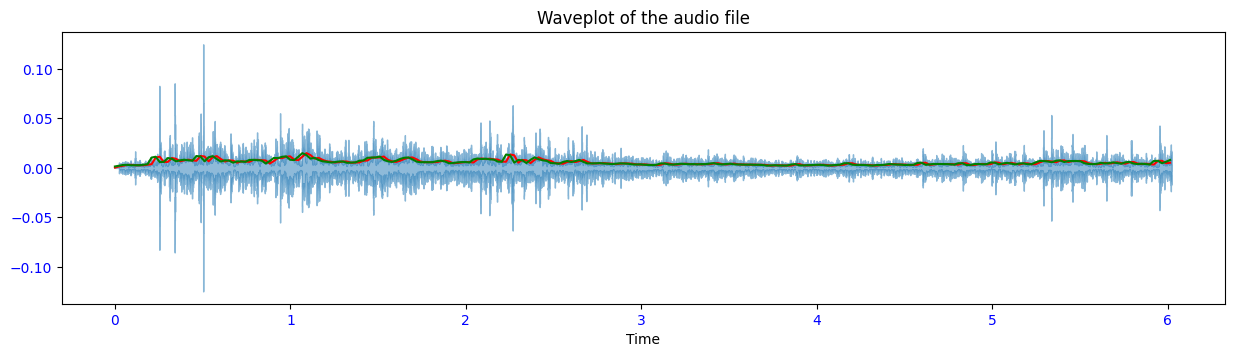

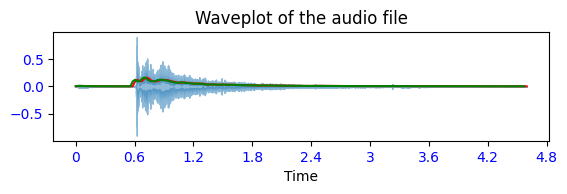

In [46]:
#plot rmse
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy_1, sr=sr_1, alpha=0.5)
plt.plot(librosa.frames_to_time(range(len(rms_debussy_1)), sr=sr_1, hop_length=hop_length), rms_debussy_1, color='r')
plt.plot(librosa.frames_to_time(range(len(rmse_debussy_a)), sr=sr_1, hop_length=hop_length), rmse_debussy_a, color='g')
plt.title('Waveplot of the audio file')
plt.xticks(color='b')
plt.yticks(color='b')
plt.show()

plt.subplot(3, 1, 2)
librosa.display.waveshow(debussy_2, sr=sr_2, alpha=0.5)
plt.plot(librosa.frames_to_time(range(len(rms_debussy_2)), sr=sr_2, hop_length=hop_length), rms_debussy_2, color='r')
plt.plot(librosa.frames_to_time(range(len(rmse_debussy_b)), sr=sr_2, hop_length=hop_length), rmse_debussy_b, color='g')
plt.title('Waveplot of the audio file')
plt.xticks(color='b')
plt.yticks(color='b')
plt.show()



In [47]:
#visualize zero crossing rate   
zcr_debussy_1 = librosa.feature.zero_crossing_rate(debussy_1, frame_length=frame_length, hop_length=hop_length)[0]
print(zcr_debussy_1.shape)

zcr_debussy_2 = librosa.feature.zero_crossing_rate(debussy_2, frame_length=frame_length, hop_length=hop_length)[0]
print(zcr_debussy_2.shape)


(260,)
(199,)


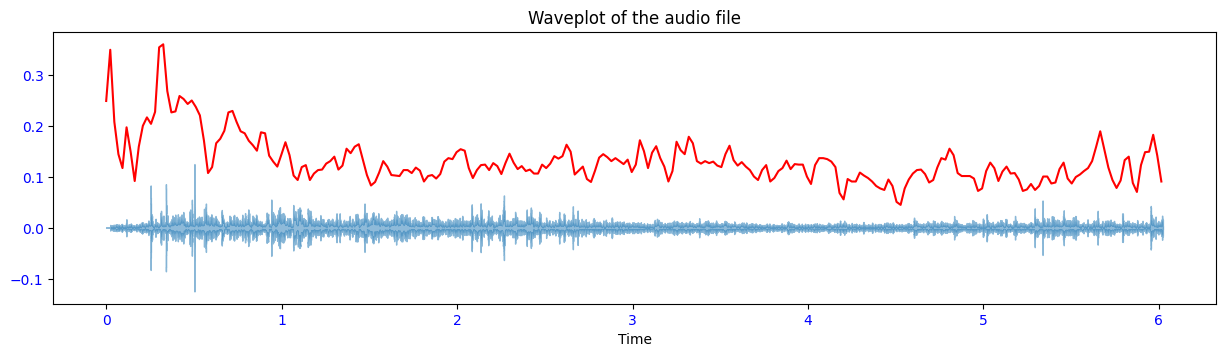

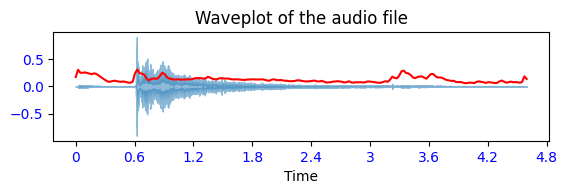

In [48]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy_1, sr=sr_1, alpha=0.5)
plt.plot(librosa.frames_to_time(range(len(zcr_debussy_1)), sr=sr_1, hop_length=hop_length), zcr_debussy_1, color='r')
plt.title('Waveplot of the audio file')
plt.xticks(color='b')
plt.yticks(color='b')
plt.show()

plt.subplot(3, 1, 2)
librosa.display.waveshow(debussy_2, sr=sr_2, alpha=0.5)
plt.plot(librosa.frames_to_time(range(len(zcr_debussy_2)), sr=sr_2, hop_length=hop_length), zcr_debussy_2, color='r')
plt.title('Waveplot of the audio file')
plt.xticks(color='b')
plt.yticks(color='b')
plt.show()

